In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("penguins.csv")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
data = data.drop_duplicates()
data.shape

(333, 8)

In [3]:
data.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [12]:
NA = data[data['sex'].isnull()]
print(NA)
data=data.drop(NA.index)
print(data.shape)

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year]
Index: []
(333, 8)


In [13]:
from scipy.stats import zscore
from scipy.stats import ttest_ind
dat=data[['bill_length_mm','flipper_length_mm','bill_depth_mm','body_mass_g']]
z_scores = zscore(dat)
cleaned_data = data[~(z_scores > 3)]
cleaned_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,NaN,NaN,39.1,18.7,181.0,3750.0,NaN,NaN
1,NaN,NaN,39.5,17.4,186.0,3800.0,NaN,NaN
2,NaN,NaN,40.3,18.0,195.0,3250.0,NaN,NaN
4,NaN,NaN,36.7,19.3,193.0,3450.0,NaN,NaN
5,NaN,NaN,39.3,20.6,190.0,3650.0,NaN,NaN
...,...,...,...,...,...,...,...,...
339,NaN,NaN,55.8,19.8,207.0,4000.0,NaN,NaN
340,NaN,NaN,43.5,18.1,202.0,3400.0,NaN,NaN
341,NaN,NaN,49.6,18.2,193.0,3775.0,NaN,NaN
342,NaN,NaN,50.8,19.0,210.0,4100.0,NaN,NaN


In [14]:
data['species'] = data['species'].astype('category').cat.codes
data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes

In [15]:
data['bill_length_mm'] = (data['bill_length_mm']-data['bill_length_mm'].min())/(data['bill_length_mm'].max()-data['bill_length_mm'].min())
data['bill_depth_mm'] = (data['bill_depth_mm']-data['bill_depth_mm'].min())/(data['bill_depth_mm'].max()-data['bill_depth_mm'].min())
data['flipper_length_mm'] = (data['flipper_length_mm']-data['flipper_length_mm'].min())/(data['flipper_length_mm'].max()-data['flipper_length_mm'].min())
data['body_mass_g'] = (data['body_mass_g']-data['body_mass_g'].min())/(data['body_mass_g'].max()-data['body_mass_g'].min())


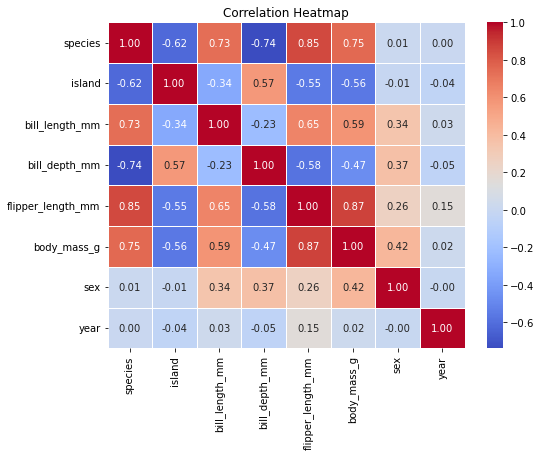

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [43]:
X=data.drop(['sex','year'],axis=1)
Y=data['sex']
df=pd.concat([X, Y], axis=1)
train_set = df.sample(frac=0.8, random_state=1)
test_set = df.drop(train_set.index)
X_train=train_set.drop('sex',axis=1)
Y_train=train_set['sex']
X_test=test_set.drop('sex',axis=1)
Y_test=test_set['sex']
print(X_train)
print(Y_train.values.reshape((-1,1)).shape)
print(X_test.shape)
print(Y_test.values.reshape((-1,1)).shape)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
65         0       0        0.345455       0.583333           0.338983   
280        1       1        0.749091       0.797619           0.423729   
187        2       0        0.592727       0.380952           0.813559   
199        2       0        0.669091       0.333333           0.898305   
296        1       1        0.374545       0.500000           0.152542   
..       ...     ...             ...            ...                ...   
2          0       2        0.298182       0.583333           0.389831   
58         0       0        0.160000       0.416667           0.152542   
273        2       0        0.665455       0.309524           0.847458   
262        2       0        0.669091       0.250000           0.745763   
269        2       0        0.607273       0.369048           0.847458   

     body_mass_g  
65      0.347222  
280     0.284722  
187     0.750000  
199     0.750000  
296     0.250000

In [44]:
class Logit_Regression:
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    def __init__(self, learning_rate, iterations):
        self.learning_rate=learning_rate
        self.best=0
        self.accuracies=[]
        self.iterations=iterations
    def fit(self,X,y):
    #     m = X_train.shape[1]
    #     n = X_train.shape[0]
        self.W =  np.random.rand(X.shape[1])
        B = 0
        self.cost_list = []
        for i in range(self.iterations):
            Z = np.dot(X,self.W.T) + B
            A = self.sigmoid(Z)
            grad = self.gradient_descent(X, y, A)
            self.W = self.W - learning_rate*grad.T
            # Keeping track of our cost function value
            c=self.cost(y,A)
            self.cost_list.append(c)
            A=(A>=0.5).astype(int)
            a=np.mean(A==y)
            self.accuracies.append(a)
            if(a>self.best):
                self.best=a
    def cost(self,y,A):
        m=len(y)
        return -(1/m)*np.sum( y*np.log(A) + (1-y)*np.log(1-A))

    def gradient_descent(self, X, y, A):
        m=len(y)
        dW = np.dot(X.T,(A - y))
        #dB = (1/m)*np.sum(A - Y)
        return dW
    def predict(self,X):
        print("Test weights/n",self.W)
        p = np.dot(X, self.W)
        pred = self.sigmoid(p)
        return (pred >= 0.5).astype(int)#To change this line

In [109]:
learning_rate = 1e-4
iterations = 10000
model=Logit_Regression(learning_rate, iterations)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

Test weights/n [-2.207767   -1.04128296  2.76196453  0.13086841  0.41570837  3.90932884]


Test Accuracy: 0.7611940298507462
Test weights/n [-2.207767   -1.04128296  2.76196453  0.13086841  0.41570837  3.90932884]
Train Accuracy: 0.7819548872180451


<IPython.core.display.Javascript object>


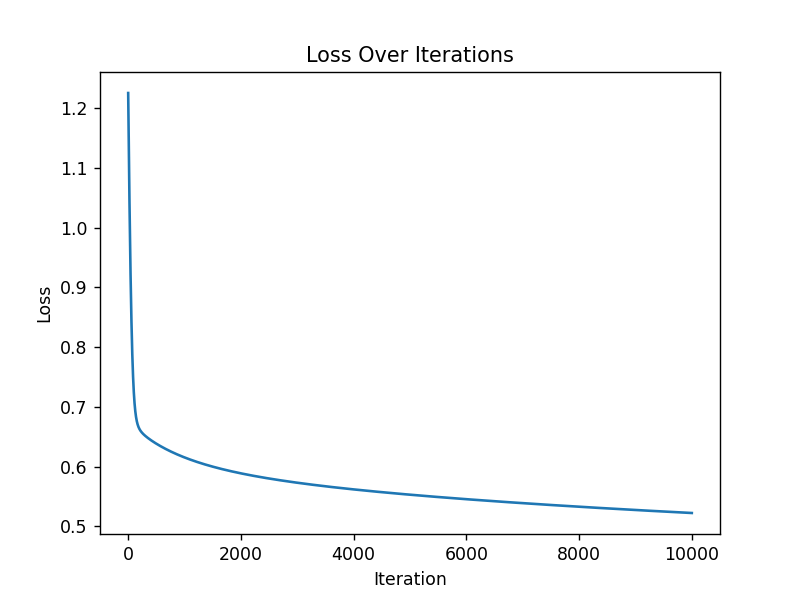

In [110]:
%matplotlib notebook
# %matplotlib inline
accuracy = np.mean(y_pred == Y_test)
print("Test Accuracy:", accuracy)

y_pred1 = model.predict(X_train)
accuracy = np.mean(y_pred1 == Y_train)
print("Train Accuracy:", accuracy)

# Plot the loss over iterations
plt.plot(range(iterations), model.cost_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()
plt.savefig('logistic_regression_case_1e_4_10000.png')